 # Important Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings("always")

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing  import StandardScaler

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import Dropout

tf.random.set_seed(42)

from sklearn import metrics



# EDA == Explantory Data Analysis

In [2]:
data = pd.read_csv('data.csv')

print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
data = data.drop(["id" , "Unnamed: 32" ] ,axis=1)

In [4]:
print(data.shape)

(569, 31)


In [5]:
data_col = data.columns.to_list

print(data_col)

<bound method IndexOpsMixin.tolist of Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')>


In [6]:
data_des = data.describe()

print(data_des)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [7]:
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [8]:
data = data.drop_duplicates()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Data Visualization

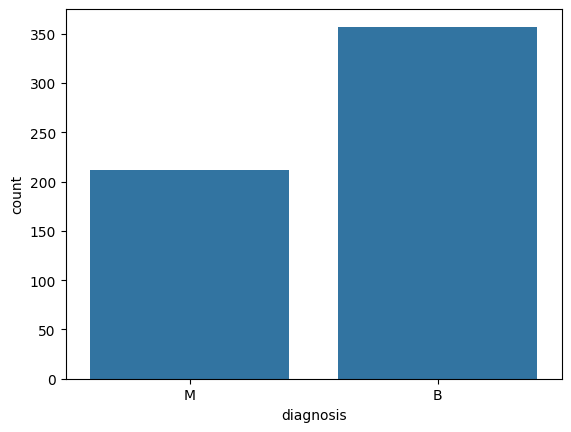

In [10]:
sns.countplot( x = "diagnosis" , data = data)
plt.show()

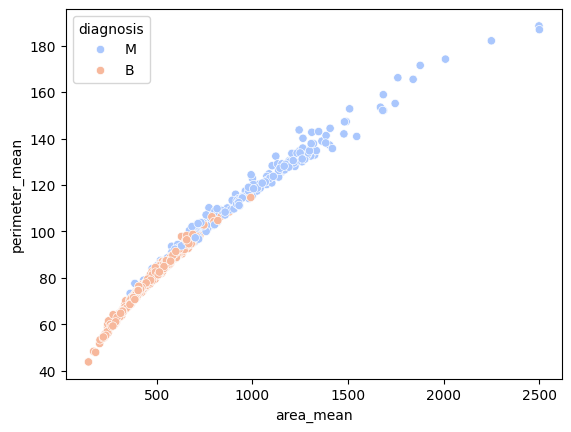

In [11]:
sns.scatterplot(x ="area_mean", y ="perimeter_mean" , data= data ,  palette="coolwarm", hue="diagnosis")
plt.show()

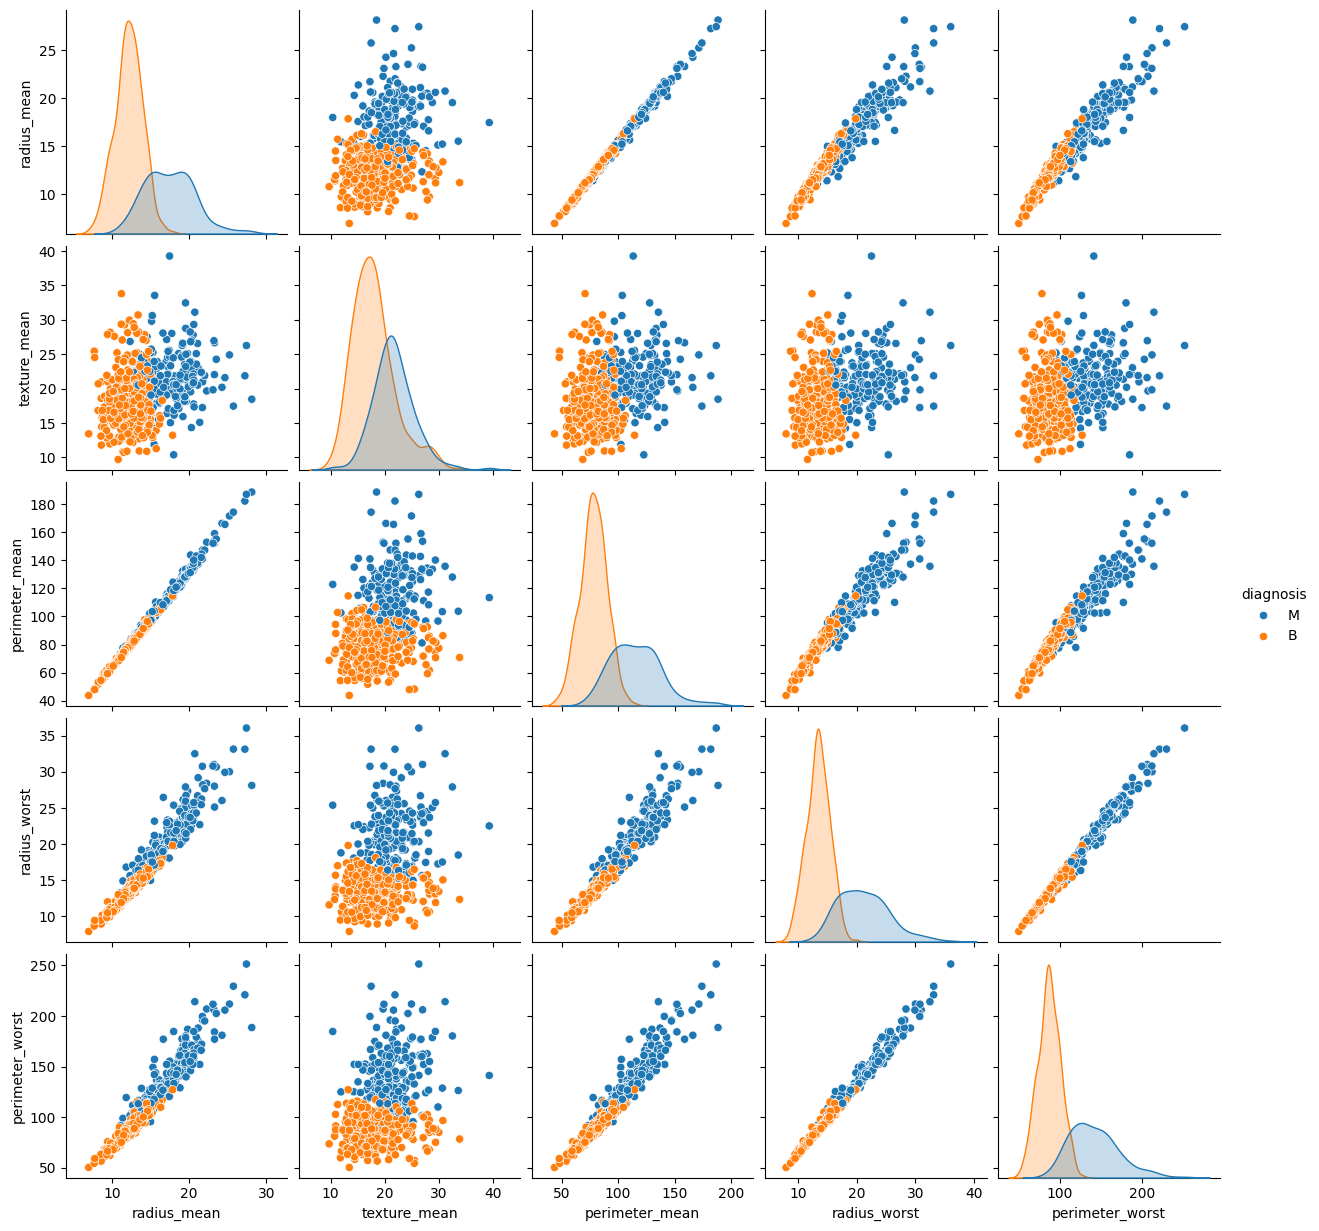

In [12]:
sns.pairplot(data, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()

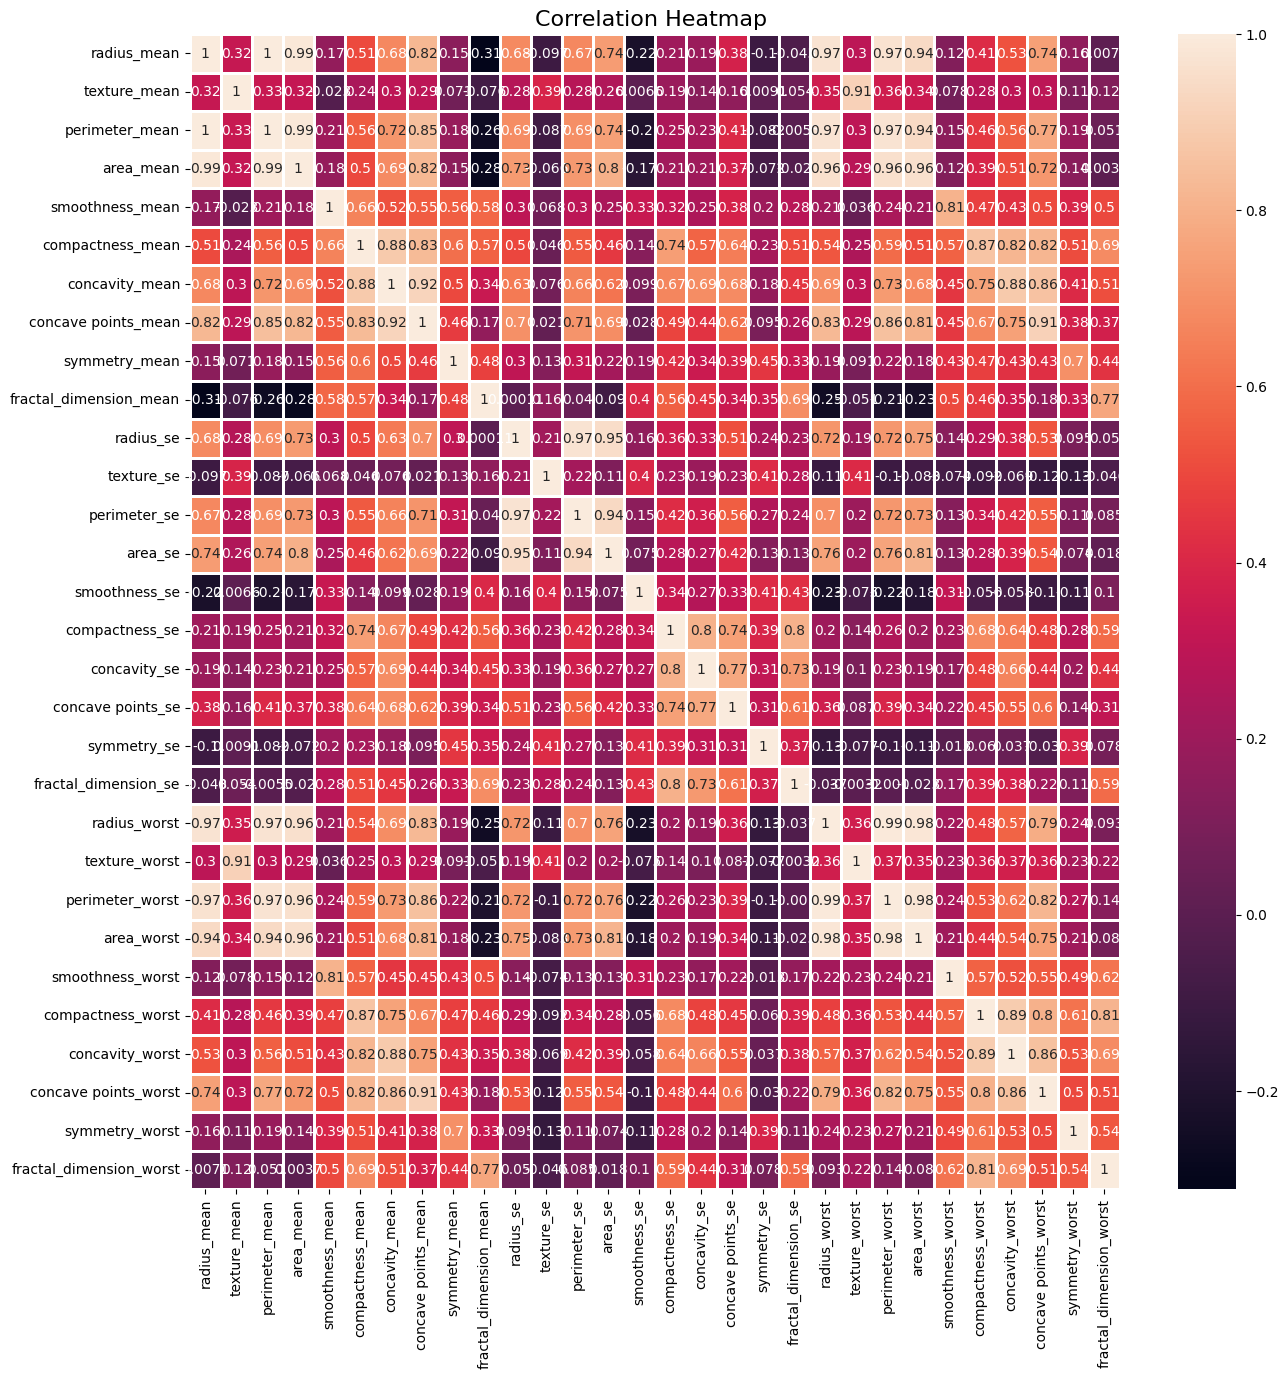

In [13]:
plt.figure(figsize=(15,15))
y_corr = data.select_dtypes(include="number")

sns.heatmap(y_corr.corr(), annot=True,linewidth=2)
plt.title('Correlation Heatmap ', fontsize=16)
plt.show()

# Preporcessing

In [14]:
data["diagnosis"] = data["diagnosis"].replace("M" , "Malignant")
data["diagnosis"] = data["diagnosis"].replace("B" , "Benign")

In [15]:
print(data["diagnosis"].value_counts())

diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64


In [16]:
le = LabelEncoder()

data["diagnosis"] = le.fit_transform(data["diagnosis"])

# Splitting Data

In [17]:
x = data.drop("diagnosis" , axis=1)
y = data["diagnosis"]

In [18]:
x_train , x_test, y_train, y_test = train_test_split( x, y , test_size=0.2 , random_state= 42)

In [19]:
S_s = StandardScaler()

x_train_scaled = S_s.fit_transform(x_train)

x_test_transformed = S_s.transform(x_test)

# Build Neural Network

In [20]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(569, 30)
(455, 30)
(114, 30)


In [21]:
Model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30 , activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2 , activation="sigmoid")
])

c:\Users\fffffffffg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
Model.compile(
    keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [23]:
model_history =  Model.fit(x_train_scaled , y_train, validation_split=0.4, epochs=100)

print(model_history)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3532 - loss: 1.3879 - val_accuracy: 0.4560 - val_loss: 0.7785
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4112 - loss: 1.1058 - val_accuracy: 0.6978 - val_loss: 0.5989
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6086 - loss: 0.8452 - val_accuracy: 0.8187 - val_loss: 0.4778
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6281 - loss: 0.7917 - val_accuracy: 0.8901 - val_loss: 0.3900
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7189 - loss: 0.6643 - val_accuracy: 0.9231 - val_loss: 0.3284
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7488 - loss: 0.5772 - val_accuracy: 0.9451 - val_loss: 0.2849
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7792 - loss: 0.5760 - val_accuracy: 0.9615 - val_loss: 0.2532
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8335 - loss: 0.4471 - val_accuracy: 0.9615 - val_loss: 0.2300

# Classification Report

In [24]:
y_pred = Model.predict(x_test_transformed)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [25]:
print(y_pred)

[[9.5642161e-01 4.9799412e-01]
 [5.5761589e-03 9.8223066e-01]
 [4.5114424e-02 8.2697934e-01]
 [9.9878931e-01 6.2951493e-01]
 [9.9991775e-01 6.5053272e-01]
 [3.5719388e-06 9.9932534e-01]
 [3.2838587e-05 9.9905419e-01]
 [1.6484274e-01 8.0779320e-01]
 [7.1658111e-01 6.5385991e-01]
 [9.9743950e-01 5.2752358e-01]
 [9.8433173e-01 4.8147568e-01]
 [1.7294925e-01 8.5622299e-01]
 [9.8379523e-01 4.9602851e-01]
 [2.7710870e-01 8.3583146e-01]
 [9.9921983e-01 5.8818638e-01]
 [6.3286638e-03 9.6970862e-01]
 [9.9706286e-01 5.4767001e-01]
 [9.9997640e-01 4.9009970e-01]
 [9.9999917e-01 5.4386735e-01]
 [1.0463487e-03 9.9278462e-01]
 [8.0594975e-01 5.3178501e-01]
 [9.9350095e-01 4.9537897e-01]
 [4.3323751e-05 9.9806821e-01]
 [9.9993241e-01 4.8154849e-01]
 [9.9880344e-01 4.7803199e-01]
 [9.9867600e-01 5.8196771e-01]
 [9.9835265e-01 6.4953172e-01]
 [9.9916536e-01 5.4975414e-01]
 [9.9532604e-01 4.9971831e-01]
 [6.3071435e-04 9.6050525e-01]
 [9.9867141e-01 5.2376407e-01]
 [9.9984586e-01 5.6798440e-01]
 [9.9905

In [26]:
label_predict = [np.argmax(i) for i in y_pred]

In [27]:
print(label_predict)


[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]


In [28]:
report = metrics.classification_report(y_test,label_predict)

print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [29]:
report = metrics.confusion_matrix(y_test,label_predict)

print(report)

[[71  0]
 [ 3 40]]


# Some Plots Compare (accuracy, val_accuracy) And (loss,val_loss)

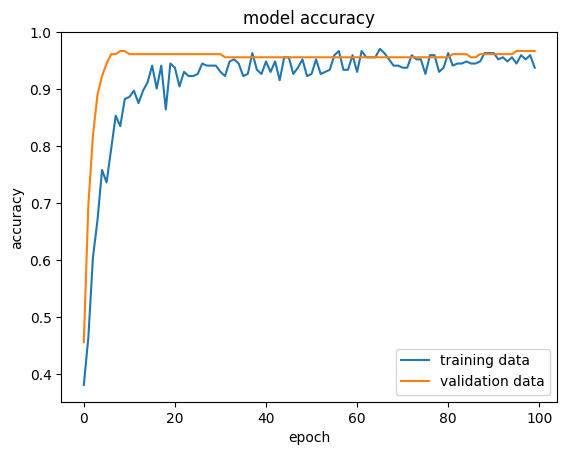

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc ='best')

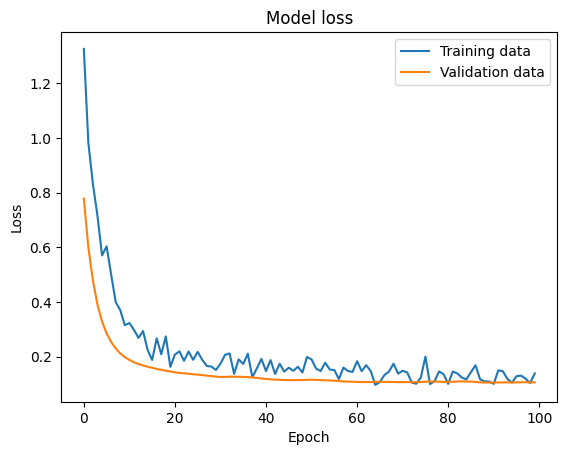

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training data', 'Validation data'], loc ='best')


In [32]:
loss, accuracy = Model.evaluate(x_test_transformed, y_test)

print(accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9738 - loss: 0.0601 
0.9736841917037964


# Builing Predictive System

In [33]:
input_data = (14.25,	21.72,	93.63,	633	,0.09823	,0.1098	,0.1319,	0.05598	,0.1885	,0.06125	,0.286	,1.019	,2.657	,24.91	,0.005878	,0.02995	,0.04815	,0.01161	,0.02028	,0.004022	,15.89	,30.36	,116.2	,799.6	,0.1446	,0.4238	,0.5186	,0.1447	,0.3591	,0.1014)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = S_s.transform(input_data_reshape)

prediction = Model.predict(input_data_std)
print(prediction)


prediction_label = np.argmax(prediction)
print(prediction_label)

if(prediction_label == 0):
  print('Tumor is Malignant')

else:
  print('Tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.16677856 0.65877265]]
1
Tumor is Benign


c:\Users\fffffffffg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
for feature in x.columns:
        print(feature)
        print(float(data[feature].min()))
        print(float(data[feature].max()))
        print("============================")

radius_mean
6.981
28.11
texture_mean
9.71
39.28
perimeter_mean
43.79
188.5
area_mean
143.5
2501.0
smoothness_mean
0.05263
0.1634
compactness_mean
0.01938
0.3454
concavity_mean
0.0
0.4268
concave points_mean
0.0
0.2012
symmetry_mean
0.106
0.304
fractal_dimension_mean
0.04996
0.09744
radius_se
0.1115
2.873
texture_se
0.3602
4.885
perimeter_se
0.757
21.98
area_se
6.802
542.2
smoothness_se
0.001713
0.03113
compactness_se
0.002252
0.1354
concavity_se
0.0
0.396
concave points_se
0.0
0.05279
symmetry_se
0.007882
0.07895
fractal_dimension_se
0.0008948
0.02984
radius_worst
7.93
36.04
texture_worst
12.02
49.54
perimeter_worst
50.41
251.2
area_worst
185.2
4254.0
smoothness_worst
0.07117
0.2226
compactness_worst
0.02729
1.058
concavity_worst
0.0
1.252
concave points_worst
0.0
0.291
symmetry_worst
0.1565
0.6638
fractal_dimension_worst
0.05504
0.2075


# Gui 

In [35]:
def predict_tumor():
    try:
        # جمع البيانات المدخلة من الحقول
        input_data = [float(entry.get()) for entry in entries]
        input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
        input_data_std = S_s.transform(input_data_as_numpy_array)
        
        # التنبؤ
        prediction = Model.predict(input_data_std)
        prediction_label = np.argmax(prediction)
        
        # عرض النتيجة
        if prediction_label == 0:
            messagebox.showinfo("النتيجة", "Tumor is Malignant")
        else:
            messagebox.showinfo("النتيجة", "Tumor is Benign")
    except Exception as e:
        messagebox.showerror("خطأ", f"يرجى إدخال بيانات صحيحة.\n{e}")

In [36]:
import customtkinter as ctk
from tkinter import messagebox
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue")
app = ctk.CTk()
app.title("تشخيص الورم")
app.geometry("500x700")
# إنشاء إطار يحتوي على شريط تمرير
frame = ctk.CTkScrollableFrame(app, width=500, height=700)
frame.pack(pady=10)

# عناوين الحقول
labels = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']



entries = []
for label_text in labels:
    label = ctk.CTkLabel(frame, text=label_text)
    label.pack(pady=5)
    entry = ctk.CTkEntry(frame, width=300)
    entry.pack(pady=5)
    entries.append(entry)
predict_button = ctk.CTkButton(frame, text="Cancer Classification", command=predict_tumor)
predict_button.pack(pady=20)

# تشغيل التطبيق
app.mainloop()

<!-- 17.02	23.98	112.8	899.3	0.1197	0.1496	0.2417	0.1203	0.2248	0.06382	0.6009	1.398	3.999	67.78	0.008268	0.03082	0.05042	0.01112	0.02102	0.003854	20.88	32.09	136.1	1344	0.1634	0.3559	0.5588	0.1847	0.353	0.08482 -->
